Computing Tf-idf scores...
Extracting top Republican words...


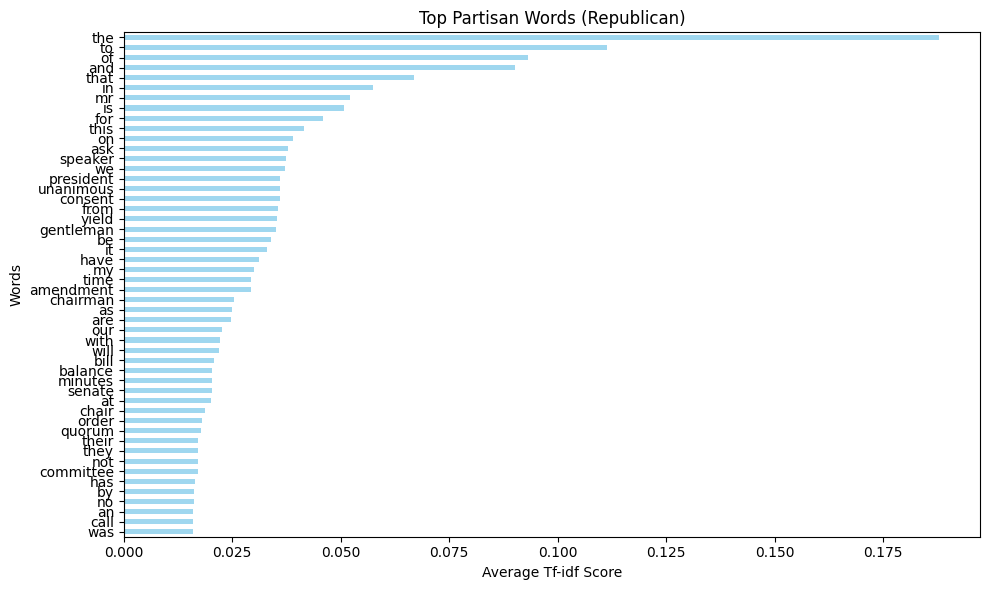

Extracting top Democrat words...


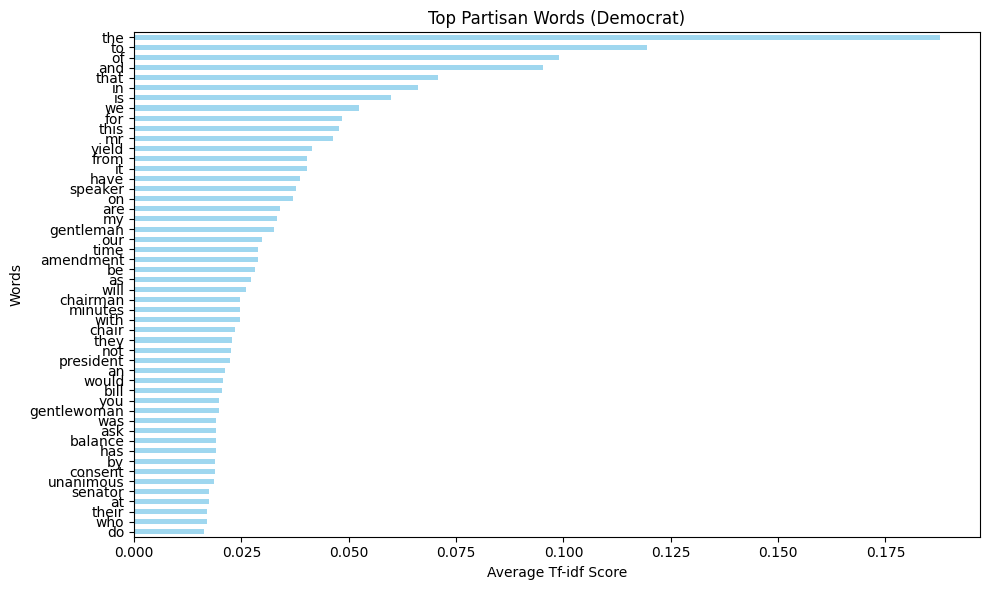

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

def load_speeches(file_path, label):
    """
    Loads speeches from a file and assigns a label (e.g., 'R' or 'D').
    
    Args:
        file_path (str): Path to the speeches file.
        label (str): Label for the speeches ('R' or 'D').
    
    Returns:
        list: List of tuples (speech_text, label).
    """
    speeches = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip():
                speeches.append((line.strip(), label))
    return speeches

def compute_tfidf(corpus, labels):
    """
    Computes Tf-idf scores for a given corpus.
    
    Args:
        corpus (list): List of speech texts.
        labels (list): List of labels corresponding to the speeches.
    
    Returns:
        DataFrame: A DataFrame with Tf-idf scores for each word and their corresponding labels.
    """
    vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame with Tf-idf scores
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    tfidf_df['label'] = labels
    return tfidf_df

def extract_top_partisan_words(tfidf_df, label, top_n=20):
    """
    Extracts top partisan words based on average Tf-idf scores for a given label.
    
    Args:
        tfidf_df (DataFrame): DataFrame with Tf-idf scores and labels.
        label (str): The label to filter by ('R' or 'D').
        top_n (int): Number of top words to extract.
    
    Returns:
        DataFrame: A DataFrame with the top partisan words and their scores.
    """
    partisan_df = tfidf_df[tfidf_df['label'] == label].drop('label', axis=1)
    avg_tfidf = partisan_df.mean().sort_values(ascending=False)  # Average Tf-idf scores
    return avg_tfidf.head(top_n)

def plot_partisan_words(top_words, label):
    """
    Plots top partisan words based on their Tf-idf scores.
    
    Args:
        top_words (Series): Series of top words with their Tf-idf scores.
        label (str): Label for the words ('Republican' or 'Democrat').
    """
    plt.figure(figsize=(10, 6))
    top_words.sort_values().plot(kind='barh', color='skyblue', alpha=0.8)
    plt.xlabel('Average Tf-idf Score')
    plt.ylabel('Words')
    plt.title(f'Top Partisan Words ({label})')
    plt.tight_layout()
    plt.show()

def main():
    republican_file = "C:/Users/hanst/Downloads/output_speeches/republican_speeches.txt"  # Replace with actual file path
    democratic_file = "C:/Users/hanst/Downloads/output_speeches/democratic_speeches.txt"  # Replace with actual file path

    # Load speeches
    republican_speeches = load_speeches(republican_file, 'R')
    democratic_speeches = load_speeches(democratic_file, 'D')

    # Combine speeches into a single corpus
    all_speeches = republican_speeches + democratic_speeches
    corpus, labels = zip(*all_speeches)

    # Compute Tf-idf scores
    print("Computing Tf-idf scores...")
    tfidf_df = compute_tfidf(corpus, labels)

    # Extract and plot top partisan words for Republicans
    print("Extracting top Republican words...")
    top_republican_words = extract_top_partisan_words(tfidf_df, label='R', top_n=50)
    plot_partisan_words(top_republican_words, label='Republican')

    # Extract and plot top partisan words for Democrats
    print("Extracting top Democrat words...")
    top_democrat_words = extract_top_partisan_words(tfidf_df, label='D', top_n=50)
    plot_partisan_words(top_democrat_words, label='Democrat')

if __name__ == "__main__":
    main()

Counting word frequencies...
Finding unique partisan words...
Plotting results...


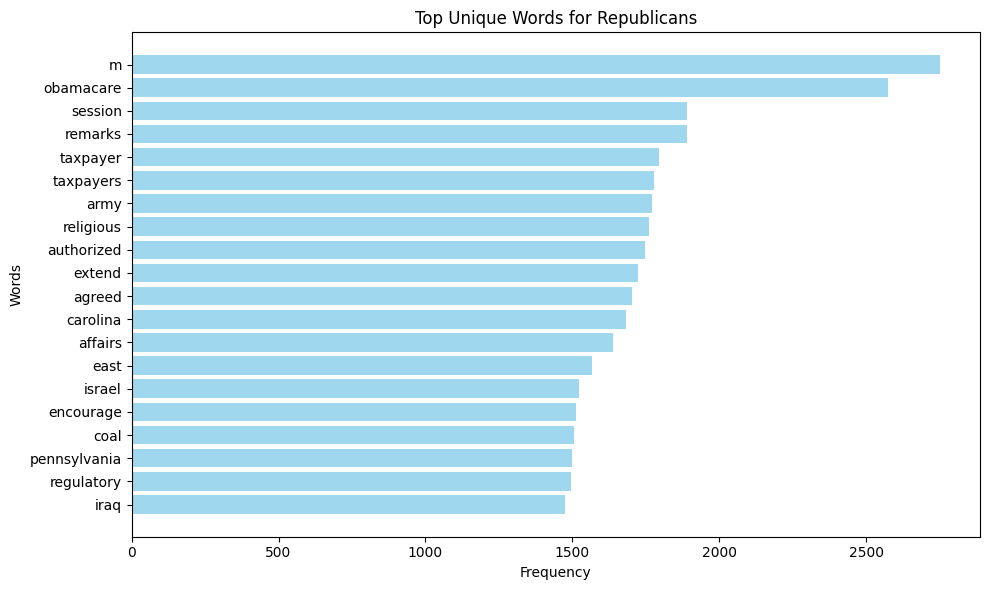

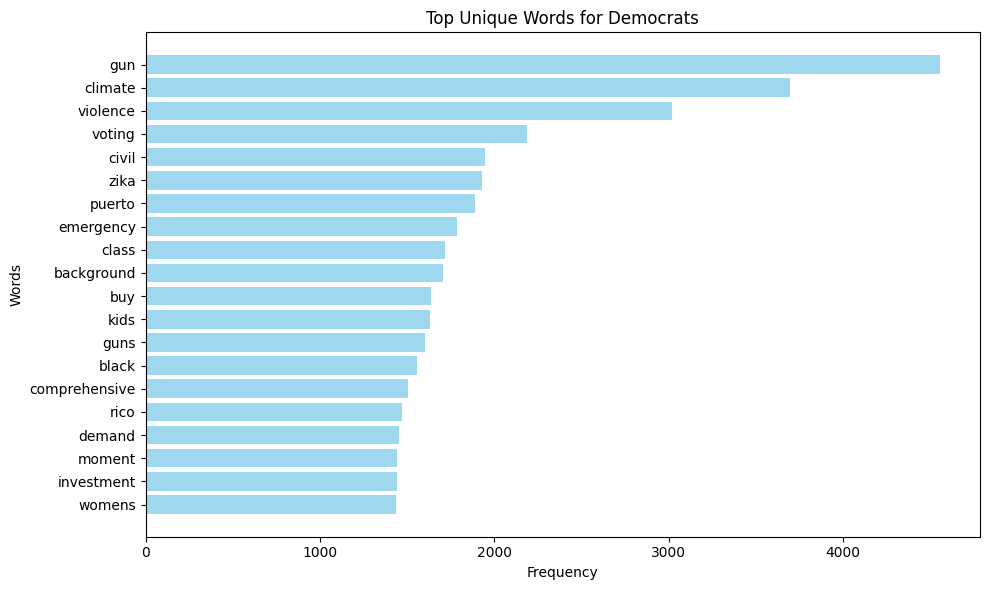

In [3]:
from collections import Counter
import re

def count_word_frequencies(file_path):
    """
    Counts word frequencies in a given text file.
    """
    word_counts = Counter()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            words = re.findall(r'\b\w+\b', line.lower())
            word_counts.update(words)
    return word_counts

def get_unique_partisan_words(rep_counts, dem_counts, top_n=1000):
    """
    Finds words that are unique to one side after extracting the top N words from each side.
    """
    # Get the top N words for each side
    rep_top_words = set(word for word, _ in rep_counts.most_common(top_n))
    dem_top_words = set(word for word, _ in dem_counts.most_common(top_n))
    
    # Find unique words
    unique_rep_words = rep_top_words - dem_top_words
    unique_dem_words = dem_top_words - rep_top_words
    
    return unique_rep_words, unique_dem_words

def plot_unique_words(unique_words, word_counts, label):
    """
    Plots unique partisan words and their frequencies.
    """
    unique_word_freqs = [(word, word_counts[word]) for word in unique_words]
    unique_word_freqs.sort(key=lambda x: x[1], reverse=True)  # Sort by frequency

    # Extract the top 20 unique words for visualization
    top_unique_words = unique_word_freqs[:20]
    words, freqs = zip(*top_unique_words)

    # Plot
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.barh(words, freqs, color='skyblue', alpha=0.8)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top Unique Words for {label}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

def main():
    republican_file = "C:/Users/hanst/Downloads/output_speeches/republican_speeches.txt"  # Replace with actual file path
    democratic_file = "C:/Users/hanst/Downloads/output_speeches/democratic_speeches.txt"  # Replace with actual file path

    # Count word frequencies for both sides
    print("Counting word frequencies...")
    rep_counts = count_word_frequencies(republican_file)
    dem_counts = count_word_frequencies(democratic_file)

    # Get unique partisan words
    print("Finding unique partisan words...")
    unique_rep_words, unique_dem_words = get_unique_partisan_words(rep_counts, dem_counts, top_n=1000)

    # Plot results
    print("Plotting results...")
    plot_unique_words(unique_rep_words, rep_counts, label='Republicans')
    plot_unique_words(unique_dem_words, dem_counts, label='Democrats')

if __name__ == "__main__":
    main()

Loading speeches by speaker...
Computing lexical similarity...
Embedding and visualizing...


C:\Users\hanst\AppData\Local\Temp\ipykernel_23812\120246728.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


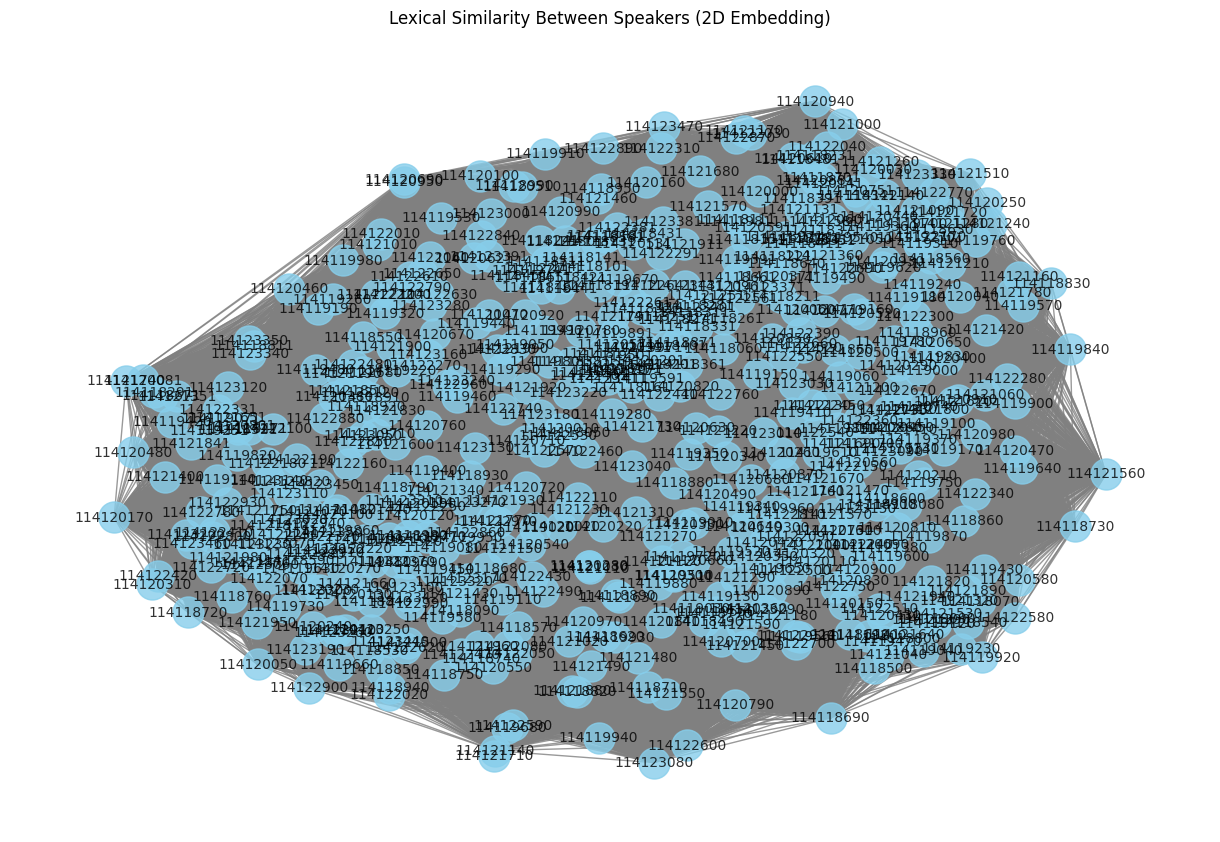

In [15]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import re

def load_speeches_by_speaker(file_path, speaker_map_path):
    """
    Loads speeches and groups them by speaker.
    """
    speaker_map = {}
    with open(speaker_map_path, 'r', encoding='utf-8') as file:
        next(file)
        for line in file:
            if not line.strip():
                continue
            fields = line.strip().split('|')
            if len(fields) > 7:
                speaker_map[fields[1]] = fields[0]  # Speech ID -> Speaker Name

    speeches_by_speaker = defaultdict(list)
    with open(file_path, 'r', encoding='iso-8859-1') as file:
        next(file)
        for line in file:
            if not line.strip():
                continue
            fields = line.strip().split('|')
            if len(fields) > 1:
                speech_id = fields[0]
                speech_text = fields[1]
                speaker = speaker_map.get(speech_id)
                if speaker:
                    speeches_by_speaker[speaker].append(speech_text)

    return {speaker: " ".join(speeches) for speaker, speeches in speeches_by_speaker.items()}

def compute_lexical_similarity(speeches_by_speaker):
    """
    Computes lexical similarity between speakers using cosine similarity.
    """
    vectorizer = CountVectorizer(max_features=5000)
    speakers = list(speeches_by_speaker.keys())
    speeches = list(speeches_by_speaker.values())

    # Convert speeches to frequency vectors
    frequency_matrix = vectorizer.fit_transform(speeches).toarray()

    # Compute cosine similarity
    similarity_matrix = cosine_similarity(frequency_matrix)

    return speakers, similarity_matrix

def embed_and_visualize(speakers, similarity_matrix, init="random"):
    """
    Embeds the lexical similarity graph into 2D and visualizes it.
    """
    # Transform similarity matrix into a non-negative dissimilarity matrix
    dissimilarity_matrix = 1 - similarity_matrix
    np.clip(dissimilarity_matrix, 0, None, out=dissimilarity_matrix)  # Ensure no negative values
    np.fill_diagonal(dissimilarity_matrix, 0)  # Set self-dissimilarity to zero

    # Perform t-SNE embedding with precomputed distances
    tsne = TSNE(n_components=2, metric='precomputed', random_state=42, init= "random")
    embedded = tsne.fit_transform(dissimilarity_matrix)

    # Create a graph
    G = nx.Graph()
    for i, speaker in enumerate(speakers):
        G.add_node(speaker, pos=embedded[i])

    # Add edges with similarity as weights
    for i in range(len(speakers)):
        for j in range(i + 1, len(speakers)):
            if similarity_matrix[i, j] > 0.3:  # Only add significant similarities
                G.add_edge(speakers[i], speakers[j], weight=similarity_matrix[i, j])

    # Plot the graph
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(12, 8))
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=500,
        node_color='skyblue',
        edge_color='gray',
        font_size=10,
        alpha=0.8,
    )
    plt.title("Lexical Similarity Between Speakers (2D Embedding)")
    plt.tight_layout()
    plt.show()
    

def main():
    speeches_file = "C:/Users/hanst/Downloads/speeches_114.txt"  # Replace with actual file path
    speaker_map_file = "C:/Users/hanst/Downloads/114_SpeakerMap.txt"  # Replace with actual file path

    # Load speeches grouped by speaker
    print("Loading speeches by speaker...")
    speeches_by_speaker = load_speeches_by_speaker(speeches_file, speaker_map_file)

    # Compute lexical similarity
    print("Computing lexical similarity...")
    speakers, similarity_matrix = compute_lexical_similarity(speeches_by_speaker)

    # Embed and visualize
    print("Embedding and visualizing...")
    embed_and_visualize(speakers, similarity_matrix)

if __name__ == "__main__":
    main()

Loading speeches by speaker...
Identifying top speakers...
Filtering speeches...
Computing lexical similarity...
Embedding and visualizing...


C:\Users\hanst\AppData\Local\Temp\ipykernel_23812\1161134520.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


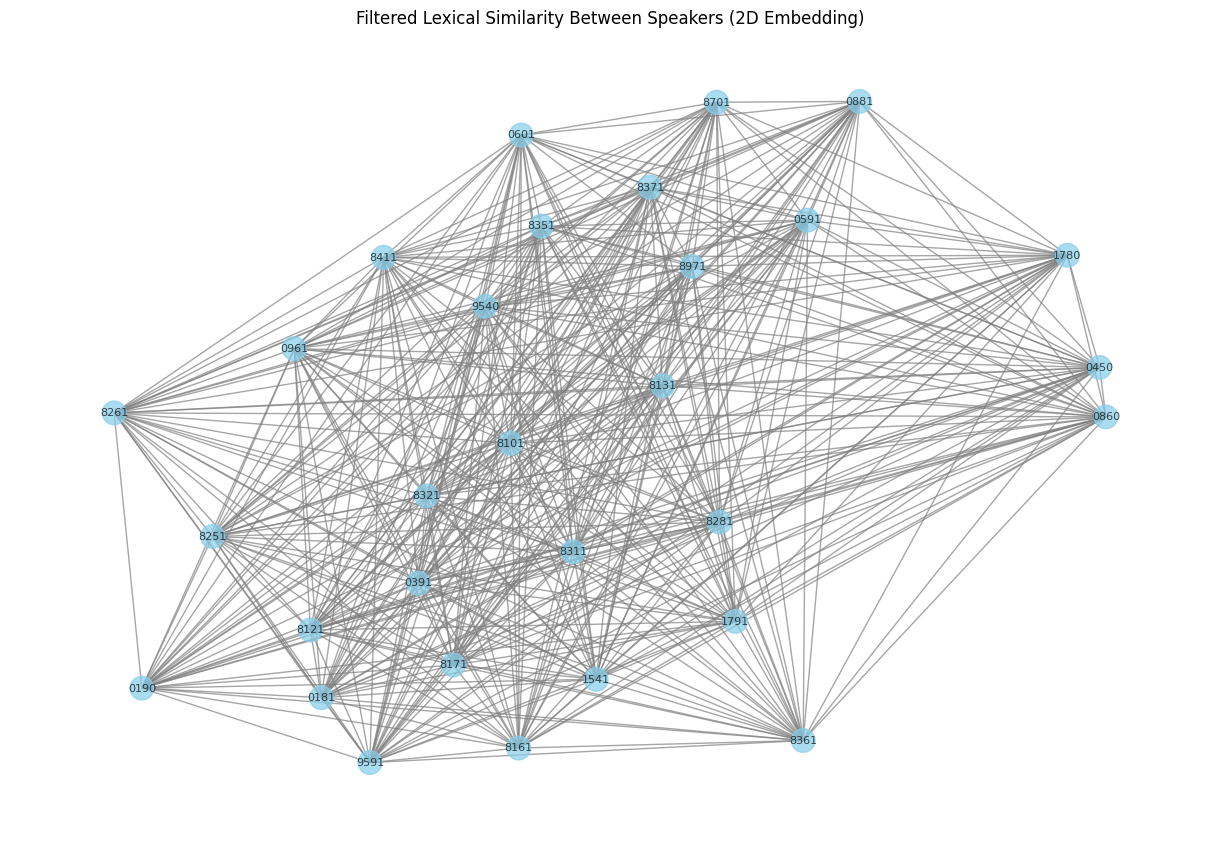

In [11]:
def get_top_speakers(speeches_by_speaker, top_n=30):
    """
    Get the top N speakers based on the total number of words spoken.
    
    Args:
        speeches_by_speaker (dict): A dictionary of speakers and their combined speeches.
        top_n (int): Number of top speakers to select.
    
    Returns:
        list: List of top N speakers.
    """
    # Count total words spoken per speaker
    speaker_word_counts = {
        speaker: len(re.findall(r'\b\w+\b', speech))  # Count words in the speech
        for speaker, speech in speeches_by_speaker.items()
    }

    # Sort speakers by word count and select the top N
    top_speakers = sorted(speaker_word_counts, key=speaker_word_counts.get, reverse=True)[:top_n]
    return top_speakers

def filter_speeches_by_top_speakers(speeches_by_speaker, top_speakers):
    """
    Filter speeches to include only the top speakers.
    
    Args:
        speeches_by_speaker (dict): A dictionary of speakers and their combined speeches.
        top_speakers (list): List of top speakers to include.
    
    Returns:
        dict: A filtered dictionary of speeches for the top speakers.
    """
    return {speaker: speeches_by_speaker[speaker] for speaker in top_speakers}

def main():
    speeches_file = "C:/Users/hanst/Downloads/speeches_114.txt"  # Replace with actual file path
    speaker_map_file = "C:/Users/hanst/Downloads/114_SpeakerMap.txt"  # Replace with actual file path

    # Load speeches grouped by speaker
    print("Loading speeches by speaker...")
    speeches_by_speaker = load_speeches_by_speaker(speeches_file, speaker_map_file)

    # Get the top 30 speakers based on word count
    print("Identifying top speakers...")
    top_speakers = get_top_speakers(speeches_by_speaker, top_n=30)

    # Filter speeches to include only top speakers
    print("Filtering speeches...")
    filtered_speeches = filter_speeches_by_top_speakers(speeches_by_speaker, top_speakers)

    # Compute lexical similarity for the top speakers
    print("Computing lexical similarity...")
    speakers, similarity_matrix = compute_lexical_similarity(filtered_speeches)

    # Embed and visualize
    print("Embedding and visualizing...")
    embed_and_visualize(speakers, similarity_matrix, init="random")

def embed_and_visualize(speakers, similarity_matrix, init="random", similarity_threshold=0.7):
    """
    Embeds the lexical similarity graph into 2D and visualizes it.
    """
    # Transform similarity matrix into a non-negative dissimilarity matrix
    dissimilarity_matrix = 1 - similarity_matrix
    np.clip(dissimilarity_matrix, 0, None, out=dissimilarity_matrix)  # Ensure no negative values
    np.fill_diagonal(dissimilarity_matrix, 0)  # Set self-dissimilarity to zero

    # Perform t-SNE embedding with precomputed distances
    perplexity = min(10, len(speakers) - 1)  # Ensure perplexity is valid
    tsne = TSNE(n_components=2, metric='precomputed', random_state=42, init=init, perplexity=perplexity)
    embedded = tsne.fit_transform(dissimilarity_matrix)

    # Create a graph
    G = nx.Graph()
    for i, speaker in enumerate(speakers):
        G.add_node(speaker, pos=embedded[i])

    # Add edges with similarity as weights (filtered by threshold)
    for i in range(len(speakers)):
        for j in range(i + 1, len(speakers)):
            if similarity_matrix[i, j] > similarity_threshold:  # Adjust threshold for clarity
                G.add_edge(speakers[i], speakers[j], weight=similarity_matrix[i, j])

    # Get positions from t-SNE embedding
    pos = nx.get_node_attributes(G, 'pos')

    # Scale node size by degree
    degrees = dict(G.degree())
    node_sizes = [degrees[node] * 10 for node in G.nodes()]  # Scale factor for visibility

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        G,
        pos,
        with_labels=True,
        labels={node: node[-4:] for node in G.nodes()},  # Show last 4 digits of speaker IDs
        node_size=node_sizes,
        node_color='skyblue',
        edge_color='gray',
        font_size=8,
        alpha=0.7,
    )
    plt.title("Filtered Lexical Similarity Between Speakers (2D Embedding)")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Loading speeches by speaker...
Identifying top speakers...
Filtering speeches...
Computing lexical similarity...
Embedding and visualizing...
Performing Louvain clustering...
Visualizing clusters...


C:\Users\hanst\AppData\Local\Temp\ipykernel_23812\821954436.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
C:\Users\hanst\AppData\Local\Temp\ipykernel_23812\821954436.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


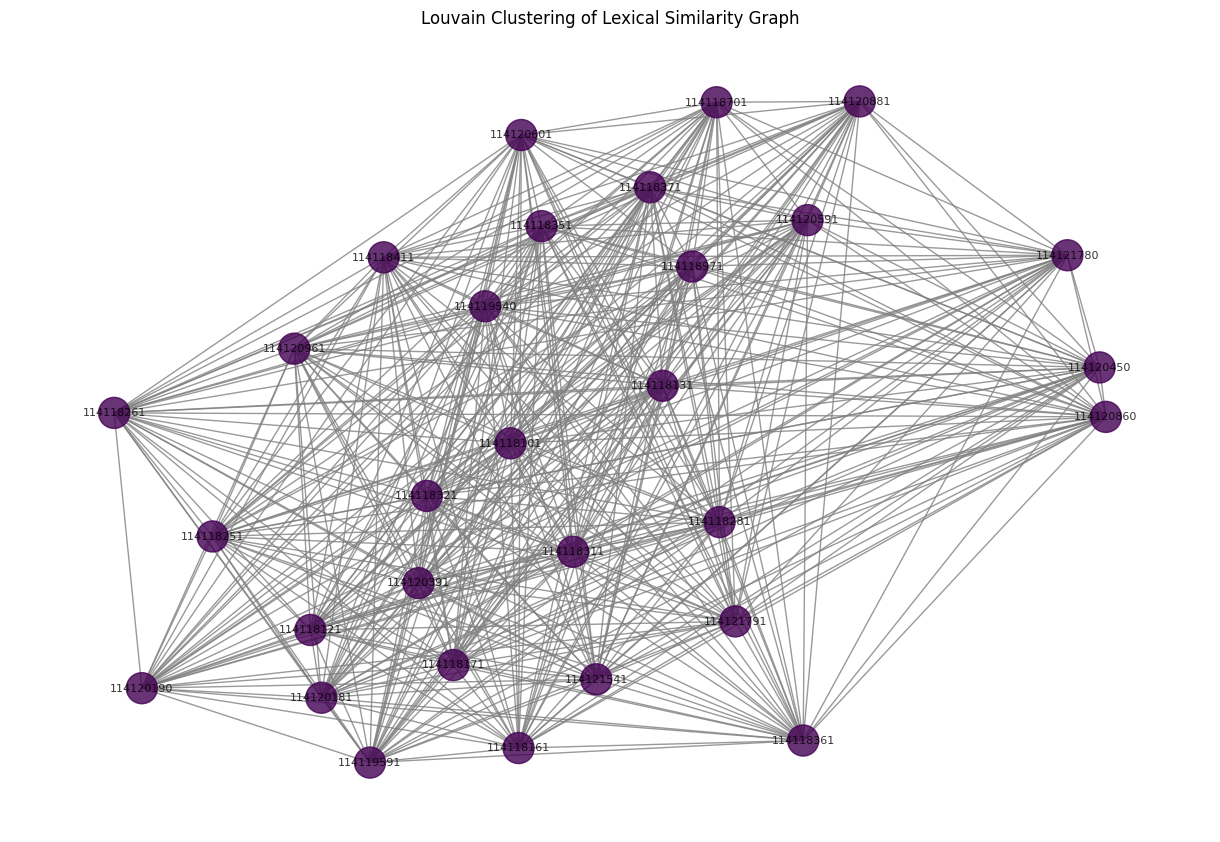

In [13]:
import community as community_louvain  # For Louvain clustering
import matplotlib.cm as cm

def perform_louvain_clustering(G):
    """
    Performs Louvain clustering on the graph.
    
    Args:
        G (nx.Graph): The graph to cluster.
    
    Returns:
        dict: A dictionary mapping nodes to their cluster labels.
    """
    # Perform Louvain clustering
    partition = community_louvain.best_partition(G, weight='weight')  # Use edge weights
    return partition

def visualize_clusters(G, partition):
    """
    Visualizes the graph with nodes colored by their cluster.
    
    Args:
        G (nx.Graph): The graph.
        partition (dict): Node-to-cluster mapping from Louvain clustering.
    """
    # Get the positions of nodes
    pos = nx.get_node_attributes(G, 'pos')

    # Assign colors to clusters
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    node_colors = [cmap(partition[node]) for node in G.nodes()]

    # Draw the graph with clusters
    plt.figure(figsize=(12, 8))
    nx.draw(
        G,
        pos,
        node_color=node_colors,
        with_labels=True,
        node_size=500,
        edge_color='gray',
        font_size=8,
        alpha=0.8,
    )
    plt.title("Louvain Clustering of Lexical Similarity Graph")
    plt.tight_layout()
    plt.show()

def main():
    speeches_file = "C:/Users/hanst/Downloads/speeches_114.txt"  # Replace with actual file path
    speaker_map_file = "C:/Users/hanst/Downloads/114_SpeakerMap.txt"  # Replace with actual file path

    # Load speeches grouped by speaker
    print("Loading speeches by speaker...")
    speeches_by_speaker = load_speeches_by_speaker(speeches_file, speaker_map_file)

    # Get the top 30 speakers based on word count
    print("Identifying top speakers...")
    top_speakers = get_top_speakers(speeches_by_speaker, top_n=30)

    # Filter speeches to include only top speakers
    print("Filtering speeches...")
    filtered_speeches = filter_speeches_by_top_speakers(speeches_by_speaker, top_speakers)

    # Compute lexical similarity for the top speakers
    print("Computing lexical similarity...")
    speakers, similarity_matrix = compute_lexical_similarity(filtered_speeches)

    # Embed the graph for visualization
    print("Embedding and visualizing...")
    dissimilarity_matrix = 1 - similarity_matrix
    np.clip(dissimilarity_matrix, 0, None, out=dissimilarity_matrix)
    np.fill_diagonal(dissimilarity_matrix, 0)

    tsne = TSNE(n_components=2, metric='precomputed', random_state=42, perplexity=10, init = "random")
    embedded = tsne.fit_transform(dissimilarity_matrix)

    # Build the graph
    G = nx.Graph()
    for i, speaker in enumerate(speakers):
        G.add_node(speaker, pos=embedded[i])
    for i in range(len(speakers)):
        for j in range(i + 1, len(speakers)):
            if similarity_matrix[i, j] > 0.3:
                G.add_edge(speakers[i], speakers[j], weight=similarity_matrix[i, j])

    # Perform Louvain clustering
    print("Performing Louvain clustering...")
    partition = perform_louvain_clustering(G)

    # Visualize the clusters
    print("Visualizing clusters...")
    visualize_clusters(G, partition)

if __name__ == "__main__":
    main()

Loading speeches by speaker...
Identifying top speakers...
Filtering speeches...
Computing lexical similarity...
Embedding with t-SNE...
Performing K-means clustering...
Visualizing clusters...


C:\Users\hanst\AppData\Local\Temp\ipykernel_23812\865404372.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(cluster_labels) + 1)
C:\Users\hanst\AppData\Local\Temp\ipykernel_23812\865404372.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


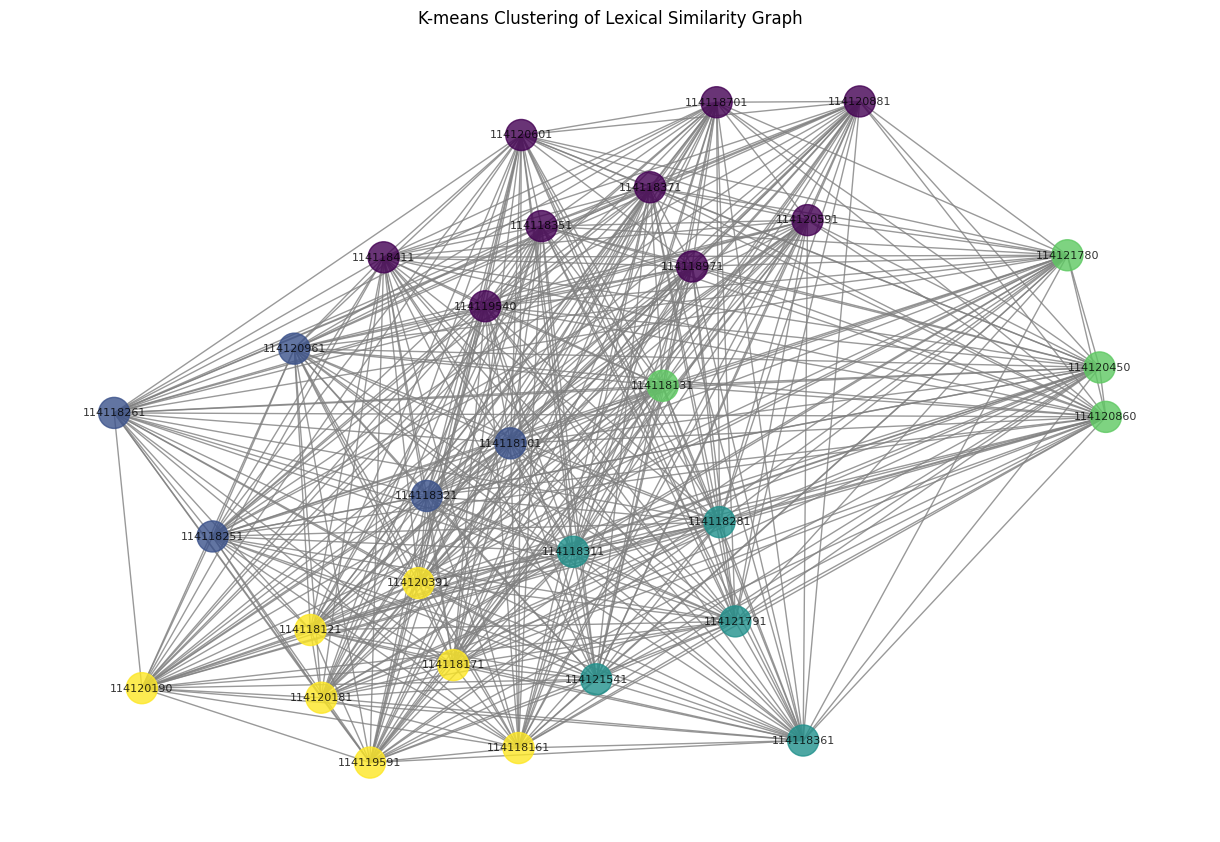

In [16]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm

def perform_kmeans_clustering(embedded, n_clusters=5):
    """
    Performs K-means clustering on the t-SNE embedded graph.

    Args:
        embedded (array): 2D array from t-SNE embedding.
        n_clusters (int): Number of clusters.

    Returns:
        list: Cluster labels for each node.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embedded)
    return cluster_labels

def visualize_kmeans_clusters(G, embedded, cluster_labels):
    """
    Visualizes the graph with nodes colored by K-means cluster labels.

    Args:
        G (nx.Graph): The graph.
        embedded (array): 2D array from t-SNE embedding.
        cluster_labels (list): Cluster labels from K-means.
    """
    pos = {node: embedded[i] for i, node in enumerate(G.nodes())}

    # Assign colors to clusters
    cmap = cm.get_cmap('viridis', max(cluster_labels) + 1)
    node_colors = [cmap(cluster_label) for cluster_label in cluster_labels]

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        node_size=500,
        edge_color='gray',
        font_size=8,
        alpha=0.8,
    )
    plt.title("K-means Clustering of Lexical Similarity Graph")
    plt.tight_layout()
    plt.show()

def main():
    speeches_file = "C:/Users/hanst/Downloads/speeches_114.txt"  # Replace with actual file path
    speaker_map_file = "C:/Users/hanst/Downloads/114_SpeakerMap.txt"  # Replace with actual file path

    # Load speeches grouped by speaker
    print("Loading speeches by speaker...")
    speeches_by_speaker = load_speeches_by_speaker(speeches_file, speaker_map_file)

    # Get the top 30 speakers based on word count
    print("Identifying top speakers...")
    top_speakers = get_top_speakers(speeches_by_speaker, top_n=30)

    # Filter speeches to include only top speakers
    print("Filtering speeches...")
    filtered_speeches = filter_speeches_by_top_speakers(speeches_by_speaker, top_speakers)

    # Compute lexical similarity for the top speakers
    print("Computing lexical similarity...")
    speakers, similarity_matrix = compute_lexical_similarity(filtered_speeches)

    # Perform t-SNE embedding
    print("Embedding with t-SNE...")
    dissimilarity_matrix = 1 - similarity_matrix
    np.clip(dissimilarity_matrix, 0, None, out=dissimilarity_matrix)
    np.fill_diagonal(dissimilarity_matrix, 0)

    tsne = TSNE(n_components=2, metric='precomputed', random_state=42, perplexity=10, init = "random")
    embedded = tsne.fit_transform(dissimilarity_matrix)

    # Build the graph
    G = nx.Graph()
    for i, speaker in enumerate(speakers):
        G.add_node(speaker, pos=embedded[i])
    for i in range(len(speakers)):
        for j in range(i + 1, len(speakers)):
            if similarity_matrix[i, j] > 0.3:
                G.add_edge(speakers[i], speakers[j], weight=similarity_matrix[i, j])

    # Perform K-means clustering
    print("Performing K-means clustering...")
    cluster_labels = perform_kmeans_clustering(embedded, n_clusters=5)

    # Visualize the clusters
    print("Visualizing clusters...")
    visualize_kmeans_clusters(G, embedded, cluster_labels)

if __name__ == "__main__":
    main()